In [7]:
def convert_rgb_to_gray_level(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im_2[i,j] = get_distance(im_1[i,j,:])
    return im_2

def get_distance(v, w = [1/3,1/3,1/3]):
    a,b,c = v[0], v[1], v[2]
    w1, w2, w3 = w[0], w[1], w[2]
    d = ((a**2)*w1 + (b**2)*w2 + (c**2)*w3) *.5
    #d = ((a**2)*w1+(b**2)*w2+(c**2)*w3)**.5
    return d

def get_default_mask_for_mean():
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9

def apply_mask(part_of_image):
    mask = get_default_mask_for_mean()
    return sum(sum(part_of_image * mask))

(<matplotlib.axes._subplots.AxesSubplot at 0x1edcbbcebe0>,
 <matplotlib.image.AxesImage at 0x1edce7310d0>)

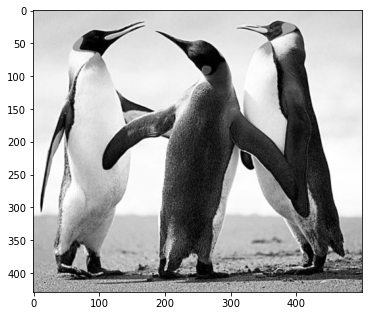

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
im_1 = mpimg.imread('penguins.jpg')
im_2 = convert_rgb_to_gray_level(im_1)
#im_3 = convert_gray_level_to_BW(im_2)
%matplotlib inline
plt.figure(figsize = (20,20))
plt.subplot(1,3,1),plt.imshow(im_1)
#plt.subplot(1,3,2),plt.imshow(im_2, cmap = 'gray')
#plt.subplot(1,3,3),plt.imshow(im_3, cmap = 'gray')

In [9]:
def get_default_mask_for_mean():
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9

def apply_mask(part_of_image):
    mask = get_default_mask_for_mean()
    return sum(sum(part_of_image * mask))

def get_median_for_55(poi):
    s_1 = poi.reshape(1,25)
    s_1.sort()
    return s_1[0,13]

def get_median(poi):
    s_1 = poi.reshape(1,9)
    s_1.sort()
    return s_1[0,4]

def get_mean_filter_for_55(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    
    for i in range (3, m-3):
        for j in range (3, n-3):
            poi = im_1[i-2:i+3, j-2:j+3]
            im_2[i,j] = get_median_for_55(poi)
    return im_2

def get_mean_filter(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    
    for i in range (1,m-1):
        for j in range (1,n-1):
            poi = im_1[i-1:i+2, j-1:j+2]
            im_2[i,j] = get_median(poi)
    return im_2

In [10]:
apply_mask(im_2[1:4,1:4])

21195.277777777774

In [11]:
im_55 = get_mean_filter_for_55(im_2)

(<matplotlib.axes._subplots.AxesSubplot at 0x1edcde57760>,
 <matplotlib.image.AxesImage at 0x1edcdeb4e80>)

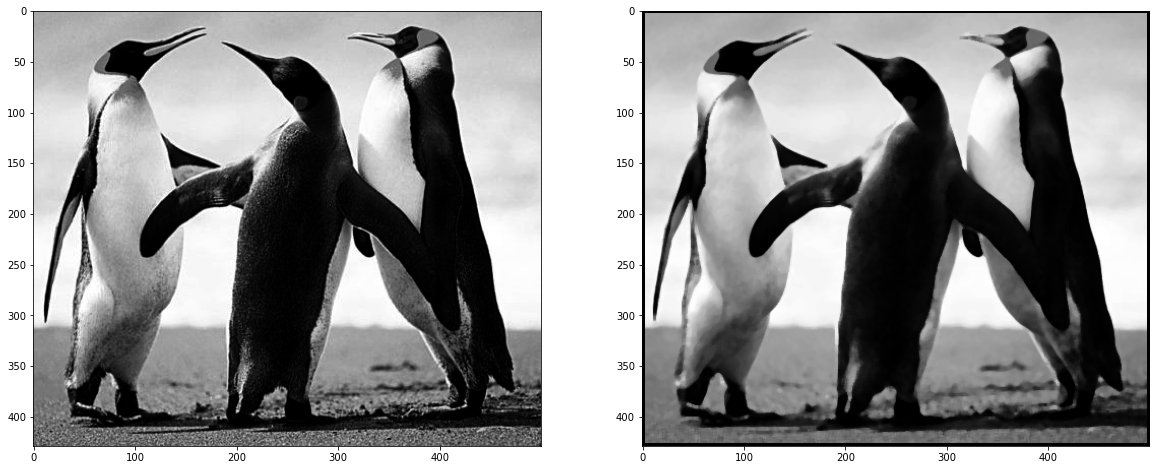

In [12]:
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(im_2, cmap = 'gray')
plt.subplot(1,2,2),plt.imshow(im_55, cmap = 'gray')